In [2]:
using JLD2
using Statistics
using Printf
using Laplacians
using Plots

In [3]:
sortrows(A, i, rev=false) = sortslices(A, dims=1, lt=(x,y)->isless(x[i],y[i]), rev=rev)

sortrows (generic function with 2 methods)

# load data 

In [4]:
datasets = [
    # unweighted chimera
    "uni_chimera_all.jl.split02merge02.n10000.h1.0.jld2",
    "uni_chimera_all.jl.split02merge02.n100000.h2.0.jld2",
    "uni_chimera_all.jl.split02merge02.n1000000.h4.0.jld2",
    "uni_chimera_all.jl.split02merge02.n10000000.h8.0.jld2",
    # weighted chimera
    "wted_chimera_nopetsc.jl.split02merge02.n10000.h1.0.jld2",
    "wted_chimera_nopetsc.jl.split02merge02.n100000.h2.0.jld2",
    "wted_chimera_nopetsc.jl.split02merge02.n1000000.h4.0.jld2",
    "wted_chimera_nopetsc.jl.split02merge02.n10000000.h8.0.jld2",
    # unweighted boundary chimera
    "uni_bndry_chimera_all.jl.split02merge02.n10000.h1.0.jld2",
    "uni_bndry_chimera_all.jl.split02merge02.n100000.h2.0.jld2",
    "uni_bndry_chimera_all.jl.split02merge02.n1000000.h4.0.jld2",
    "uni_bndry_chimera_all.jl.split02merge02.n10000000.h8.0.jld2",
    # weighted boundary chimera
    "wted_bndry_chimera_nopetsc.jl.split02merge02.n10000.h1.0.jld2",
    "wted_bndry_chimera_nopetsc.jl.split02merge02.n100000.h2.0.jld2",
    "wted_bndry_chimera_nopetsc.jl.split02merge02.n1000000.h4.0.jld2",
    "wted_bndry_chimera_nopetsc.jl.split02merge02.n10000000.h8.0.jld2",
    # max flow 
    "chimeraIPM_nopetsc.jl.split02merge02.jld2",
    "spielmanIPM_all.jl.split02merge02.jld2",
    # Sachdeva star 
    "sachdeva_star_all.jl.split02merge02.jld2",
    # SPE 
    "spe_all.jl.split02merge02.jld2",
    # uniform grid
    "uniform_grid_all.jl.split02merge02.jld2",
    # checkered grid (high contrast grid)
    "checkered_all.jl.split02merge02.jld2",
    # aniso grid 
    "aniso_all.jl.split02merge02.jld2",
    # weighted grid 
    "wgrid_all.jl.split02merge02.jld2",
    # SuiteSparse 
    "suitesparse_all.jl.split02merge02.jld2"
];

In [5]:
function combine(a, b)
    return [a; b]
end

combine (generic function with 1 method)

In [6]:
dic_all = Dict();
for (i, ds) in enumerate(datasets)
    if i == 1
        dic_all = copy(load_object(ds))
    else
        dic = copy(load_object(ds))
        dic_all = merge(combine,dic_all, dic);
    end
end

# ac scaling on all 

In [22]:
nnz_w_time = [ dic_all["ne"] dic_all["ac_tot"] ];
sort_nnz_w_time = sortrows(nnz_w_time,1);

# remove problems that are too small
size_skip = searchsortedfirst(sort_nnz_w_time[:,1], 1000)
nnzmin = sort_nnz_w_time[size_skip,1]
nnzmax = sort_nnz_w_time[end,1]

2.56000801e8

Here's a plot of t/nnz as a function of nnz (log scale on x-axis)

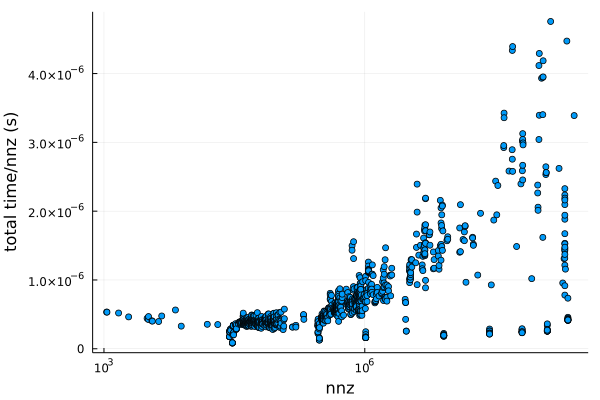

In [24]:
pdata = [ sort_nnz_w_time[size_skip:end,1] sort_nnz_w_time[size_skip:end,2]./sort_nnz_w_time[size_skip:end,1] ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,
    xlabel = "nnz",
    ylabel = "total time/nnz (s)"
    )

The simplest plot would just be nnz vs time -- but this doesn't seem that useful w/o a slope estimate. Log scale on both axes.

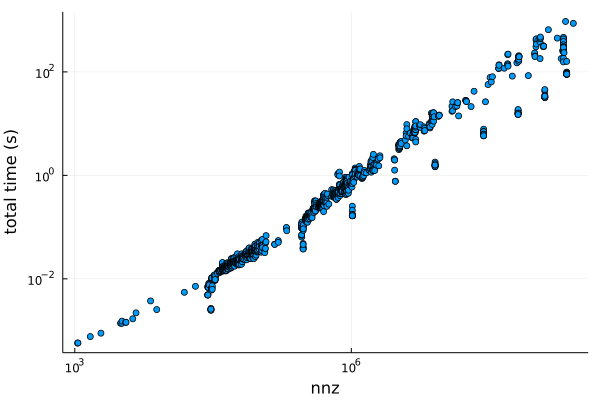

In [25]:
pdata = [ sort_nnz_w_time[size_skip:end,1] sort_nnz_w_time[size_skip:end,2] ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,yaxis=:log,xlims=(),
    xlabel = "nnz",
    ylabel = "total time (s)"
    )

If O(mlog^3m) is an upper bound, then after dividing by that, we shouldn't see growth. The following plots show the ratio of time by mlog^3m. Log scale on both axes.

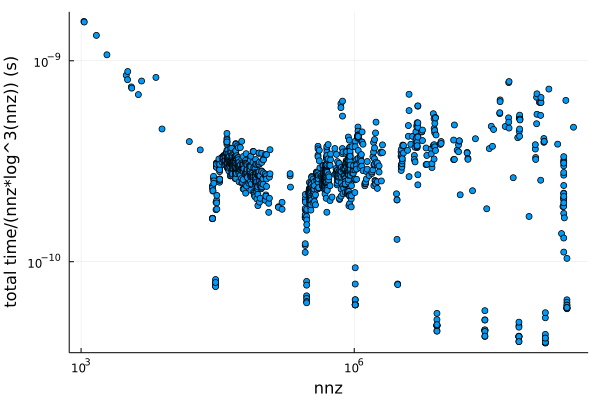

In [26]:
pdata = [ sort_nnz_w_time[size_skip:end,1] sort_nnz_w_time[size_skip:end,2]./((x->x*log(x)^3).(sort_nnz_w_time[size_skip:end,1])) ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,yaxis=:log,
    xlabel = "nnz",
    ylabel = "total time/(nnz*log^3(nnz)) (s)"
    )

# comparisons w fits

Maybe we can get a better sense of the data by adding a line for m log^3 m?

Here's m vs time and m vs 1e-8 mlog^3m

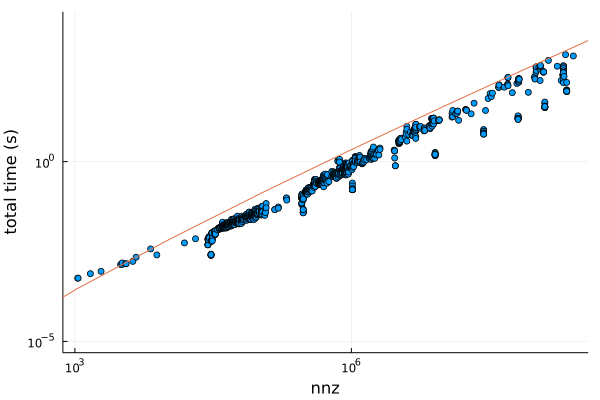

In [27]:
pdata = sort_nnz_w_time[size_skip:end,:]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log,yaxis=:log)

logmin = log10(nnzmin)-1
logmax = log10(nnzmax)+1
pmodelx = [10^i for i = logmin:logmax];
pmodely = [ 1e-8 * 10^i * i^3 for i = logmin:logmax];

plot!(pmodelx,pmodely,label="",xaxis =:log,xlims=[nnzmin,nnzmax],yaxis=:log,
    xlabel = "nnz",
    ylabel = "total time (s)"
    )

Next let's see m vs time/n and m vs 1e-8 log^3m


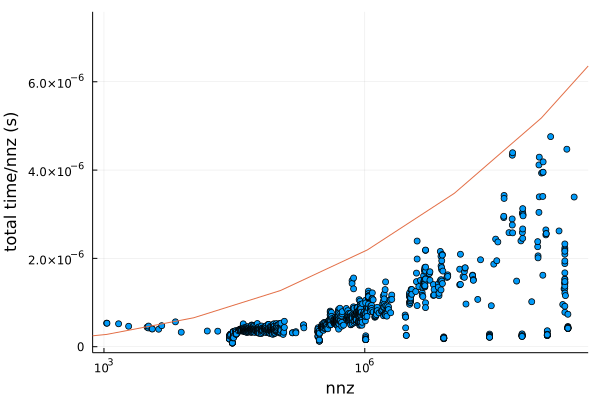

In [29]:
pdata = [ sort_nnz_w_time[size_skip:end,1] sort_nnz_w_time[size_skip:end,2]./sort_nnz_w_time[size_skip:end,1] ]
scatter(pdata[:,1],pdata[:,2],label="",xaxis =:log)

nnzmin = sort_nnz_w_time[size_skip,1]
nnzmax = sort_nnz_w_time[end,1]

logmin = log10(nnzmin)-1
logmax = log10(nnzmax)+1
pmodelx = [10^i for i = logmin:logmax];
pmodely = [ 1e-8 * i^3 for i = logmin:logmax];

plot!(pmodelx,pmodely,label="",xaxis =:log,xlims=[nnzmin,nnzmax],
    xlabel = "nnz",
    ylabel = "total time/nnz (s)"
    )

# ac2 scaling on all

In [13]:
nnz_w_time = [ dic_all["ne"] dic_all["ac-s2m2_tot"] ];